In [1]:
# reload
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from utils.simulation import *
from utils import plotting
#from utils.mutual import (compute_mutual_information_from_trajectories, mutual_information_slowjumps, MC_underhood)
#from utils.analytical import *

In [2]:
def get_default_params_system():
    ### Info system
    N = 2
    w = 2
    k = 1.1
    tau_ei = 1.
    tau_p = 10.
    p = .1
    r = np.ones(N)
    D = .01
    
    return {'N': N, 'w': w, 'k': k, 'tau_ei': tau_ei, 'r': r, 'tau_p': tau_p, 'p': p, 'D': D}

In [10]:
### Info input
M = 3
tau_h = 80
wup = 1 / tau_h
wdown = 1 / tau_h
delta_h = .5
hs = np.arange(M) * delta_h
hs = np.stack([hs, np.zeros(M)])

W = create_transition_matrix_star_graph(M, wup, wdown)

p_stat = np.array([wdown] + [wup] * (M-1))
p_stat = p_stat / p_stat.sum()

### Info simulation
steps = int(1e5)
dt = 0.005

### Create info dictionary
info_input = create_info_input(W, hs)
info_simulation = create_info_simulation(steps,dt)

# Low p

In [11]:
info_system = create_info_system(**get_default_params_system())

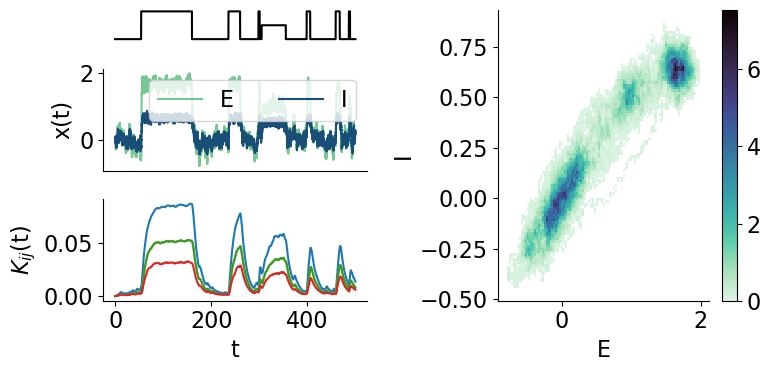

In [12]:
inputs, states = simulate_coupled_system(info_system, info_input, info_simulation, linear=False, seed=None)
states, plasticity = states

plotting.plot_simulation(states, inputs, plasticity, hs[0], dt, max_steps_to_plot = int(1e5))leaving only fixed points. We show in Sec. VI that fixed

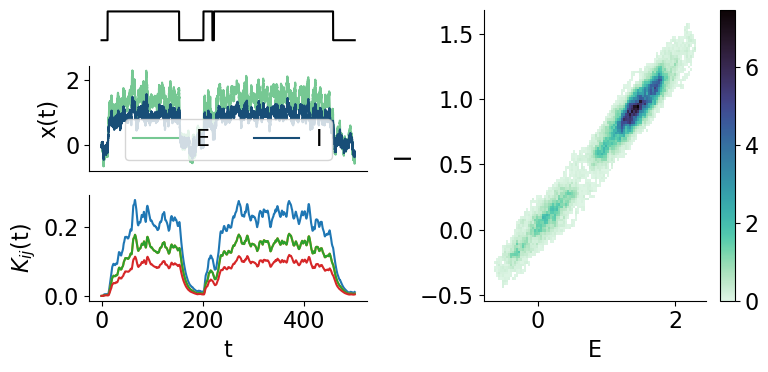

In [13]:
inputs, states = simulate_coupled_system(info_system, info_input, info_simulation, linear=True, seed=None)
states, plasticity = states

plotting.plot_simulation(states, inputs, plasticity, hs[0], dt, max_steps_to_plot = int(1e5))

# High p

In [14]:
info_system = create_info_system(**get_default_params_system())
info_system['p'] = 1.

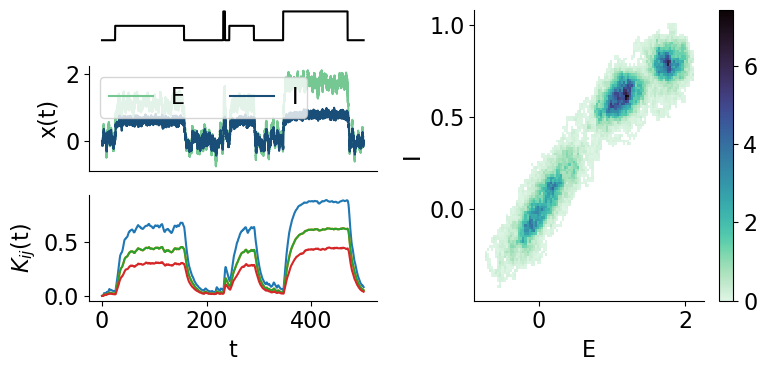

In [15]:
inputs, states = simulate_coupled_system(info_system, info_input, info_simulation, linear=False, seed=None)
states, plasticity = states

plotting.plot_simulation(states, inputs, plasticity, hs[0], dt, max_steps_to_plot = int(1e5))

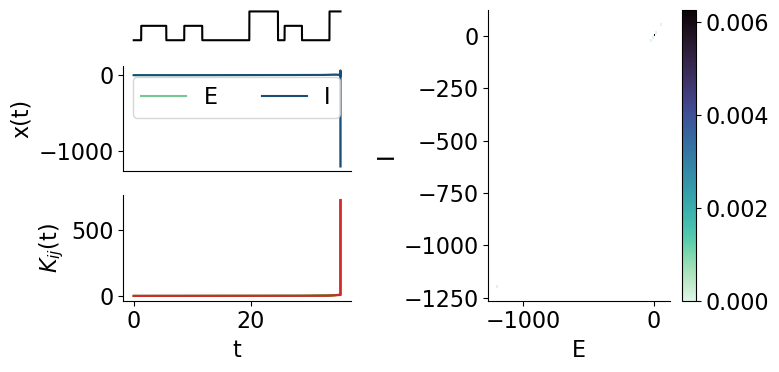

In [16]:
inputs, states = simulate_coupled_system(info_system, info_input, info_simulation, linear=True, seed=None)
states, plasticity = states

plotting.plot_simulation(states, inputs, plasticity, hs[0], dt, max_steps_to_plot = int(1e5))